In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##This Dataset contain ball by ball deliveries and outcome for each IPL Match from 2008 to 2020

In [ ]:
df_deliveries = pd.read_csv('/content/drive/MyDrive/KDD Project/IPL Ball-by-Ball 2008-2020.csv')
df_deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


##This Dataset contains the outcome of each match and several other variables like which team won the toss and what did they opt for after winning the toss, which is a crucial thing in a game of cricket.


In [ ]:
df_matches = pd.read_csv('/content/drive/MyDrive/KDD Project/IPL Matches 2008-2020.csv')
df_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
df_matches['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Durban             15
Bengaluru          15
Visakhapatnam      13
Sharjah            12
Ahmedabad          12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Ranchi              7
Cape Town           7
Port Elizabeth      7
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
East London         3
Kimberley           3
Bloemfontein        2
Name: city, dtype: int64

##We will remove several irrelevant features from both datasets which will not be useful in modeling as well as EDA

In [ ]:
df_deliveries = df_deliveries.drop(['non_striker', 'non_boundary'], axis=1)
df_deliveries.head()


,id,inning,over,ball,batsman,bowler,batsman_runs,extra_runs,total_runs,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,AA Noffke,1,0,1,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,AA Noffke,1,0,1,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,Z Khan,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,Z Khan,1,0,1,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,Z Khan,1,0,1,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [ ]:
df_matches = df_matches.drop(['eliminator', 'method', 'umpire1', 'umpire2', 'result_margin'], axis=1)
df_matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets


In [ ]:
# Extracted year from the "date" variable so that if needed, we can analyze the dataset or performance according to each season. 

df_matches['year'] = pd.DatetimeIndex(df_matches['date']).year
df_matches.head(3)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,2008


In [ ]:
## Creating a dictionary with key value pair of the team's name and it's appropriate abbreviation.
#  so that we can get rid of the long team names.

print("Team Names :", df_deliveries['batting_team'].unique(), "\n")
keys = np.sort((df_deliveries['batting_team'].unique()))
values = ['CSK', 'DC', 'DD', 'DD', 'GL', 'KXIP', 'KTK', 'KKR', 'MI', 'PWI', 'RR', 'RPS', 'RPS', 'RCB', 'SRH']
team_dict = dict(zip(keys, values))
print("Abbreviation dict : ",team_dict)

Team Names : ['Kolkata Knight Riders' 'Royal Challengers Bangalore' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Delhi Daredevils'
 'Mumbai Indians' 'Deccan Chargers' 'Kochi Tuskers Kerala' 'Pune Warriors'
 'Sunrisers Hyderabad' 'Rising Pune Supergiants' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Delhi Capitals'] 

Abbreviation dict :  {'Chennai Super Kings': 'CSK', 'Deccan Chargers': 'DC', 'Delhi Capitals': 'DD', 'Delhi Daredevils': 'DD', 'Gujarat Lions': 'GL', 'Kings XI Punjab': 'KXIP', 'Kochi Tuskers Kerala': 'KTK', 'Kolkata Knight Riders': 'KKR', 'Mumbai Indians': 'MI', 'Pune Warriors': 'PWI', 'Rajasthan Royals': 'RR', 'Rising Pune Supergiant': 'RPS', 'Rising Pune Supergiants': 'RPS', 'Royal Challengers Bangalore': 'RCB', 'Sunrisers Hyderabad': 'SRH'}


In [ ]:
# Replacing the long team names with appropriate abbreaviation

df_deliveries['batting'] = df_deliveries['batting_team'].replace(team_dict)
df_deliveries['bowling'] = df_deliveries['bowling_team'].replace(team_dict)
df_deliveries.head()

,id,inning,over,ball,batsman,bowler,batsman_runs,extra_runs,total_runs,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,batting,bowling
0,335982,1,6,5,RT Ponting,AA Noffke,1,0,1,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,KKR,RCB
1,335982,1,6,6,BB McCullum,AA Noffke,1,0,1,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,KKR,RCB
2,335982,1,7,1,BB McCullum,Z Khan,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,KKR,RCB
3,335982,1,7,2,BB McCullum,Z Khan,1,0,1,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,KKR,RCB
4,335982,1,7,3,RT Ponting,Z Khan,1,0,1,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore,KKR,RCB


In [ ]:
# We can remove the variable with team names since we have the appropriate abbreviation value for it

df_deliveries = df_deliveries.drop(['batting_team', 'bowling_team'], axis=1)
df_deliveries.head(3)


,id,inning,over,ball,batsman,bowler,batsman_runs,extra_runs,total_runs,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting,bowling
0,335982,1,6,5,RT Ponting,AA Noffke,1,0,1,0,NaN,NaN,NaN,NaN,KKR,RCB
1,335982,1,6,6,BB McCullum,AA Noffke,1,0,1,0,NaN,NaN,NaN,NaN,KKR,RCB
2,335982,1,7,1,BB McCullum,Z Khan,0,0,0,0,NaN,NaN,NaN,NaN,KKR,RCB


In [ ]:
# We will sort the dataframe by match id, inning id, over and balls to make it more insightful

df_deliveries = df_deliveries.sort_values(by=['id','inning', 'over','ball'])
df_deliveries.head()

,id,inning,over,ball,batsman,bowler,batsman_runs,extra_runs,total_runs,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting,bowling
79,335982,1,0,1,SC Ganguly,P Kumar,0,1,1,0,NaN,NaN,NaN,legbyes,KKR,RCB
80,335982,1,0,2,BB McCullum,P Kumar,0,0,0,0,NaN,NaN,NaN,NaN,KKR,RCB
81,335982,1,0,3,BB McCullum,P Kumar,0,1,1,0,NaN,NaN,NaN,wides,KKR,RCB
82,335982,1,0,4,BB McCullum,P Kumar,0,0,0,0,NaN,NaN,NaN,NaN,KKR,RCB
83,335982,1,0,5,BB McCullum,P Kumar,0,0,0,0,NaN,NaN,NaN,NaN,KKR,RCB


In [ ]:
## Replacing the teams names in other dataset

df_matches['team1'] = df_matches['team1'].replace(team_dict)
df_matches['team2'] = df_matches['team2'].replace(team_dict)
df_matches['toss_winner'] = df_matches['toss_winner'].replace(team_dict)
df_matches['winner'] = df_matches['winner'].replace(team_dict)
df_matches

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DD,RR,RR,bat,DD,wickets,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,DC,DC,bat,KKR,wickets,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,RCB,MI,MI,field,RCB,tie,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,MI,DD,DD,field,MI,runs,2020
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,RCB,SRH,SRH,field,SRH,wickets,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,DD,SRH,DD,bat,DD,runs,2020


##Missing values handling

In [ ]:
df_matches.isnull().sum()

id                  0
city               13
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
year                0
dtype: int64

In [ ]:
df_matches['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah'], dtype=object)

Imputing the null values in city based on venue. 




In [ ]:
venue = [df_matches['venue']=='Dubai International Cricket Stadium', df_matches['venue']=='Sharjah Cricket Stadium']
city = ['Dubai', 'Sharjah']

df_matches['city'] = np.where(df_matches['city'].isnull(), np.select(venue, city), df_matches['city'])

In [ ]:
np.sort(df_matches['city'].unique())

array(['Abu Dhabi', 'Ahmedabad', 'Bangalore', 'Bengaluru', 'Bloemfontein',
       'Cape Town', 'Centurion', 'Chandigarh', 'Chennai', 'Cuttack',
       'Delhi', 'Dharamsala', 'Dubai', 'Durban', 'East London',
       'Hyderabad', 'Indore', 'Jaipur', 'Johannesburg', 'Kanpur',
       'Kimberley', 'Kochi', 'Kolkata', 'Mumbai', 'Nagpur',
       'Port Elizabeth', 'Pune', 'Raipur', 'Rajkot', 'Ranchi', 'Sharjah',
       'Visakhapatnam'], dtype=object)

In [ ]:
# in "city" variable, we have 2 different names ['Bangalore', 'Bengaluru'] which are identifying the same city 
df_matches['city'] = df_matches['city'].replace({'Bengaluru':'Bangalore'})
np.sort(df_matches['city'].unique())

array(['Abu Dhabi', 'Ahmedabad', 'Bangalore', 'Bloemfontein', 'Cape Town',
       'Centurion', 'Chandigarh', 'Chennai', 'Cuttack', 'Delhi',
       'Dharamsala', 'Dubai', 'Durban', 'East London', 'Hyderabad',
       'Indore', 'Jaipur', 'Johannesburg', 'Kanpur', 'Kimberley', 'Kochi',
       'Kolkata', 'Mumbai', 'Nagpur', 'Port Elizabeth', 'Pune', 'Raipur',
       'Rajkot', 'Ranchi', 'Sharjah', 'Visakhapatnam'], dtype=object)

In [ ]:
df_matches.isnull().sum()

id                 0
city               0
date               0
player_of_match    4
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             4
result             4
year               0
dtype: int64

In [ ]:
# Dropping the rest because filling null values in 'winner' variable does not make any sense. 

df_matches = df_matches.dropna()

In [ ]:
# In an IPL match the homeground advantage can be a deciding factor in winning the game. 
# We have 2 vaiables "venue" and "city" which can tell us where the match is being played. 
# However, for simplicity we will only consider the city variable as we only want to find out 
# that which team has homeground advantage and one city might have 2-3 cricket-grounds (venues). 

print("Unique Cities :\n " , df_matches['city'].unique(),"\n")
print("Unique Venues: \n", df_matches['venue'].unique(),"\n")

df_matches.drop(['venue'], axis=1)
df_matches.head()

Unique Cities :
  ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Sharjah' 'Dubai' 'Rajkot' 'Kanpur'] 

Unique Venues: 
 ['M Chinnaswamy Stadium' 'Punjab Cricket Association Stadium, Mohali'
 'Feroz Shah Kotla' 'Wankhede Stadium' 'Eden Gardens'
 'Sawai Mansingh Stadium' 'Rajiv Gandhi International Stadium, Uppal'
 'MA Chidambaram Stadium, Chepauk' 'Dr DY Patil Sports Academy' 'Newlands'
 "St George's Park" 'Kingsmead' 'SuperSport Park' 'Buffalo Park'
 'New Wanderers Stadium' 'De Beers Diamond Oval' 'OUTsurance Oval'
 'Brabourne Stadium' 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Holkar Cricket Stadium'
 'Dr. Y.

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,RCB,KKR,RCB,field,KKR,runs,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,KXIP,CSK,CSK,bat,CSK,runs,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,DD,RR,RR,bat,DD,wickets,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,MI,RCB,MI,bat,RCB,wickets,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,KKR,DC,DC,bat,KKR,wickets,2008


##Exploratory Data Analysis

Visualizing the teams with most wins in IPL seasons. 

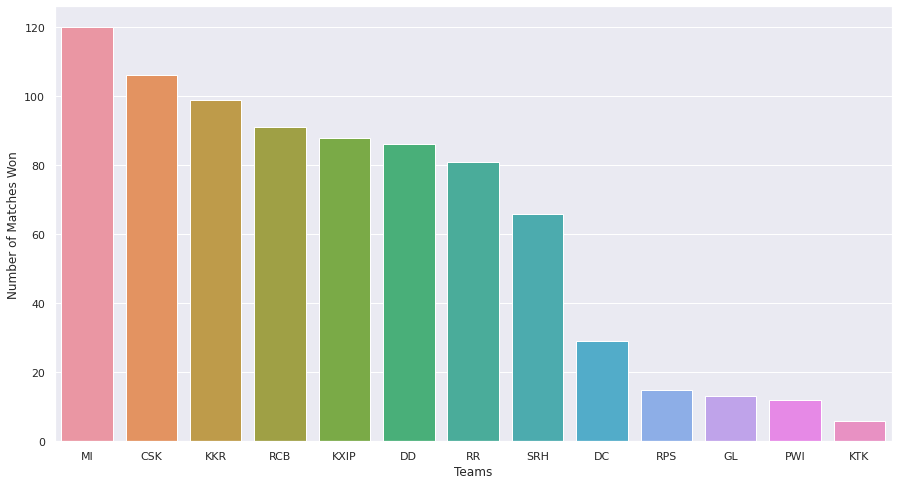

In [ ]:
plt.figure(figsize=(15,8))
axis = sns.countplot(x='winner', data=df_matches, order=df_matches['winner'].value_counts().index)
axis.set(xlabel="Teams", ylabel="Number of Matches Won")
plt.show()

Visualizing the team with most toss wins.

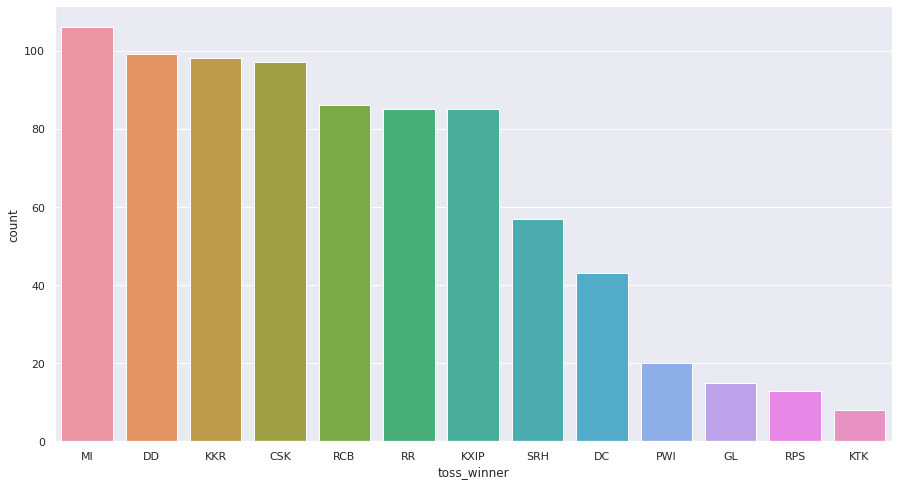

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='toss_winner', data=df_matches, order=df_matches['toss_winner'].value_counts().index)
axis.set(xlabel="Teams", ylabel="Number of Toss Won")
plt.show()

According to both the graphs above,
It is clearly evident that the Toss is an important factor in a IPL match.
Now we will furthur explore the data by looking how are the teams performing when batting first and bowling first. 


Batting First Winning percentage

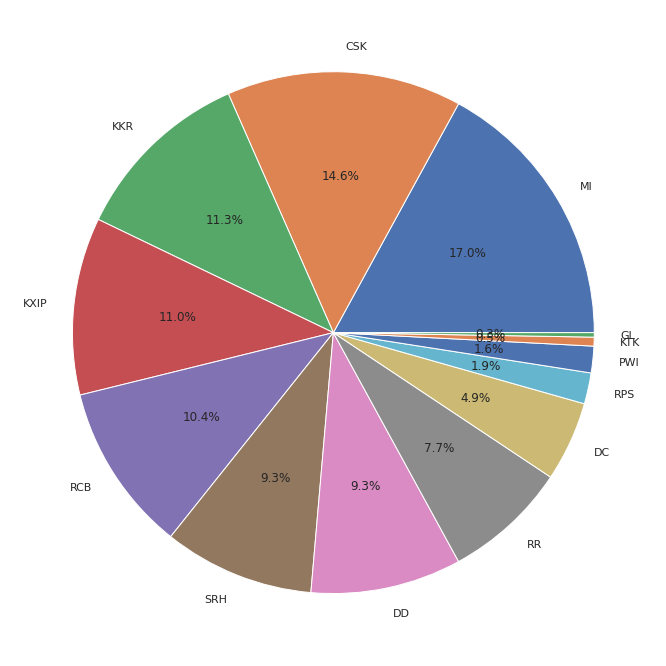

In [ ]:

bat_first_won = df_matches[df_matches['result']=='runs']
plt.figure(figsize=(12,12))

plt.pie(list(bat_first_won['winner'].value_counts()), labels=list(bat_first_won['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

Bowling First winning percentage. 

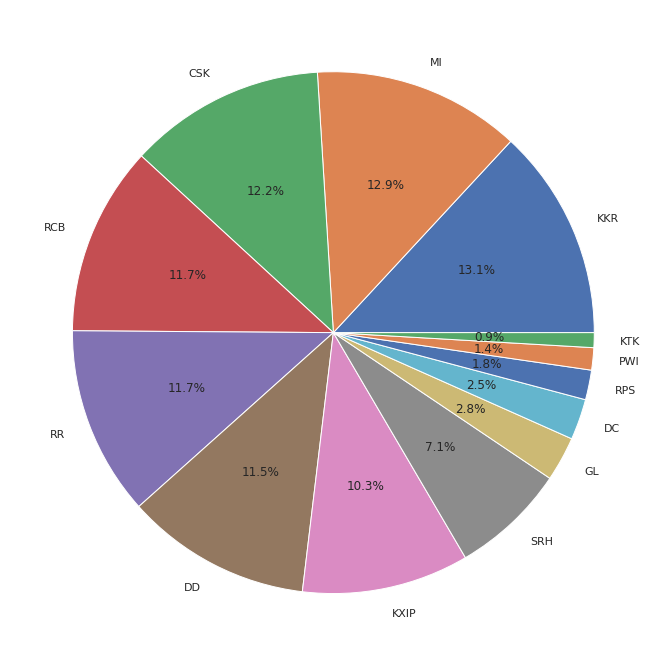

In [ ]:

bowl_first_won = df_matches[df_matches['result']=='wickets']
plt.figure(figsize=(12,12))

plt.pie(list(bowl_first_won['winner'].value_counts()), labels=list(bowl_first_won['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

In [ ]:
df_deliveries

,id,inning,over,ball,batsman,bowler,batsman_runs,extra_runs,total_runs,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting,bowling
79,335982,1,0,1,SC Ganguly,P Kumar,0,1,1,0,NaN,NaN,NaN,legbyes,KKR,RCB
80,335982,1,0,2,BB McCullum,P Kumar,0,0,0,0,NaN,NaN,NaN,NaN,KKR,RCB
81,335982,1,0,3,BB McCullum,P Kumar,0,1,1,0,NaN,NaN,NaN,wides,KKR,RCB
82,335982,1,0,4,BB McCullum,P Kumar,0,0,0,0,NaN,NaN,NaN,NaN,KKR,RCB
83,335982,1,0,5,BB McCullum,P Kumar,0,0,0,0,NaN,NaN,NaN,NaN,KKR,RCB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193372,1237181,2,17,6,HH Pandya,K Rabada,1,0,1,0,NaN,NaN,NaN,NaN,MI,DD
193373,1237181,2,18,1,HH Pandya,A Nortje,1,0,1,0,NaN,NaN,NaN,NaN,MI,DD
193374,1237181,2,18,2,Ishan Kishan,A Nortje,1,0,1,0,NaN,NaN,NaN,NaN,MI,DD
193375,1237181,2,18,3,HH Pandya,A Nortje,0,0,0,1,caught,HH Pandya,AM Rahane,NaN,MI,DD


In [ ]:
df_batsman_runs = df_deliveries[['batsman','batsman_runs']]
most_runs_batsman = df_batsman_runs.groupby('batsman').sum()
most_runs_batsman

,batsman_runs
batsman,
A Ashish Reddy,280
A Chandila,4
A Chopra,53
A Choudhary,25
A Dananjaya,4
...,...
YV Takawale,192
Yashpal Singh,47
Younis Khan,3


In [ ]:
top10_batsman = most_runs_batsman.sort_values(by='batsman_runs', ascending=False)[0:10]
top10_batsman

,batsman_runs
batsman,
V Kohli,5878
SK Raina,5368
DA Warner,5254
RG Sharma,5230
S Dhawan,5197
AB de Villiers,4849
CH Gayle,4772
MS Dhoni,4632
RV Uthappa,4607


In [ ]:
df_deliveries['dismissal_kind'].value_counts()

caught                   5743
bowled                   1700
run out                   893
lbw                       571
stumped                   294
caught and bowled         269
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [ ]:
df_bowler_wicket = df_deliveries[['bowler', 'is_wicket', 'dismissal_kind']]
df_bowler_wicket['dismissal_kind'] = df_bowler_wicket['dismissal_kind'].apply(lambda x: np.NaN if x in ['obstructing the field', 'retired hurt', 'run out'] else x)
df_bowler_wicket = df_bowler_wicket.dropna()
df_bowler_wicket

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bowler,is_wicket,dismissal_kind
112,Z Khan,1,caught
32,JH Kallis,1,caught
64,AA Noffke,1,caught
210,I Sharma,1,bowled
217,AB Dinda,1,bowled
...,...,...,...
193381,NM Coulter-Nile,1,caught
193289,MP Stoinis,1,caught
193362,A Nortje,1,caught
193367,K Rabada,1,bowled


In [ ]:
df_bowler_wicket = df_bowler_wicket.drop(['dismissal_kind'], axis=1)
most_wickets_bowlers = df_bowler_wicket.groupby('bowler').sum()
most_wickets_bowlers = most_wickets_bowlers.sort_values(by='is_wicket', ascending=False)

In [ ]:
top10_bowlers = most_wickets_bowlers[0:10]
top10_bowlers

,is_wicket
bowler,
SL Malinga,170
A Mishra,160
PP Chawla,156
DJ Bravo,153
Harbhajan Singh,150
R Ashwin,138
B Kumar,136
SP Narine,127
YS Chahal,121


In [ ]:
season_player_of_match = pd.DataFrame(df_matches.groupby('year')['player_of_match'].value_counts())

In [ ]:
# Player of  Match awards season wise.
season_player_of_match

player_of_match
year player_of_match                 
2008 SE Marsh                       5
     SR Watson                      4
     YK Pathan                      4
     AC Gilchrist                   2
     M Ntini                        2
...                               ...
2020 Sandeep Sharma                 1
     Shivam Mavi                    1
     Shubman Gill                   1
     V Kohli                        1
     WP Saha                        1

[558 rows x 1 columns]

#Data Preparation for modeling

In [ ]:
main_df = df_matches[['team1', 'team2', 'toss_winner','toss_decision','city','neutral_venue','winner']]

In [ ]:
main_df

,team1,team2,toss_winner,toss_decision,city,neutral_venue,winner
0,RCB,KKR,RCB,field,Bangalore,0,KKR
1,KXIP,CSK,CSK,bat,Chandigarh,0,CSK
2,DD,RR,RR,bat,Delhi,0,DD
3,MI,RCB,MI,bat,Mumbai,0,RCB
4,KKR,DC,DC,bat,Kolkata,0,KKR
...,...,...,...,...,...,...,...
811,RCB,MI,MI,field,Dubai,0,RCB
812,MI,DD,DD,field,Dubai,0,MI
813,RCB,SRH,SRH,field,Abu Dhabi,0,SRH
814,DD,SRH,DD,bat,Abu Dhabi,0,DD


In [ ]:
main_df

,team1,team2,toss_winner,toss_decision,city,neutral_venue,winner
0,RCB,KKR,RCB,field,Bangalore,0,KKR
1,KXIP,CSK,CSK,bat,Chandigarh,0,CSK
2,DD,RR,RR,bat,Delhi,0,DD
3,MI,RCB,MI,bat,Mumbai,0,RCB
4,KKR,DC,DC,bat,Kolkata,0,KKR
...,...,...,...,...,...,...,...
811,RCB,MI,MI,field,Dubai,0,RCB
812,MI,DD,DD,field,Dubai,0,MI
813,RCB,SRH,SRH,field,Abu Dhabi,0,SRH
814,DD,SRH,DD,bat,Abu Dhabi,0,DD


In [ ]:
# Creating a target variable 'team1_win' which is 1 if the team 1 is winning ad 0 if team 2 is inning.

main_df.loc[main_df["winner"]==main_df["team1"],"team1_win"]=1
main_df.loc[main_df["winner"]!=main_df["team1"],"team1_win"]=0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
main_df

,team1,team2,toss_winner,toss_decision,city,neutral_venue,winner,team1_win
0,RCB,KKR,RCB,field,Bangalore,0,KKR,0.0
1,KXIP,CSK,CSK,bat,Chandigarh,0,CSK,0.0
2,DD,RR,RR,bat,Delhi,0,DD,1.0
3,MI,RCB,MI,bat,Mumbai,0,RCB,0.0
4,KKR,DC,DC,bat,Kolkata,0,KKR,1.0
...,...,...,...,...,...,...,...,...
811,RCB,MI,MI,field,Dubai,0,RCB,1.0
812,MI,DD,DD,field,Dubai,0,MI,1.0
813,RCB,SRH,SRH,field,Abu Dhabi,0,SRH,0.0
814,DD,SRH,DD,bat,Abu Dhabi,0,DD,1.0


In [ ]:
# 'toss_winner' is 1 if team_1 wins the toss and 0 if team 2 wins the toss

main_df.loc[main_df["toss_winner"]==main_df["team1"],"team1_toss_win"]=1
main_df.loc[main_df["toss_winner"]!=main_df["team1"],"team1_toss_win"]=0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
main_df

,team1,team2,toss_winner,toss_decision,city,neutral_venue,winner,team1_win,team1_toss_win
0,RCB,KKR,RCB,field,Bangalore,0,KKR,0.0,1.0
1,KXIP,CSK,CSK,bat,Chandigarh,0,CSK,0.0,0.0
2,DD,RR,RR,bat,Delhi,0,DD,1.0,0.0
3,MI,RCB,MI,bat,Mumbai,0,RCB,0.0,1.0
4,KKR,DC,DC,bat,Kolkata,0,KKR,1.0,0.0
...,...,...,...,...,...,...,...,...,...
811,RCB,MI,MI,field,Dubai,0,RCB,1.0,0.0
812,MI,DD,DD,field,Dubai,0,MI,1.0,0.0
813,RCB,SRH,SRH,field,Abu Dhabi,0,SRH,0.0,0.0
814,DD,SRH,DD,bat,Abu Dhabi,0,DD,1.0,1.0


In [ ]:
main_df = main_df.drop(['toss_winner', 'winner'], axis=1)
main_df.head()

,team1,team2,toss_decision,city,neutral_venue,team1_win,team1_toss_win
0,RCB,KKR,field,Bangalore,0,0.0,1.0
1,KXIP,CSK,bat,Chandigarh,0,0.0,0.0
2,DD,RR,bat,Delhi,0,1.0,0.0
3,MI,RCB,bat,Mumbai,0,0.0,1.0
4,KKR,DC,bat,Kolkata,0,1.0,0.0


we can remove 'toss_winner' and 'winner' as we have created 2 different variables similar to them 

In [ ]:
main_df['toss_decision'].value_counts()

field    493
bat      319
Name: toss_decision, dtype: int64

In [ ]:
# converting toss decision to binary variable. 
main_df['toss_decision'] = main_df['toss_decision'].apply(lambda x: 1 if x=='field' else 0)
main_df.head()

,team1,team2,toss_decision,city,neutral_venue,team1_win,team1_toss_win
0,RCB,KKR,1,Bangalore,0,0.0,1.0
1,KXIP,CSK,0,Chandigarh,0,0.0,0.0
2,DD,RR,0,Delhi,0,1.0,0.0
3,MI,RCB,0,Mumbai,0,0.0,1.0
4,KKR,DC,0,Kolkata,0,1.0,0.0


we will furthur encode the remaining variables of the dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
main_df['team1'] = encoder.fit_transform(main_df['team1'])
main_df['team2'] = encoder.fit_transform(main_df['team2'])
main_df['city'] = encoder.fit_transform(main_df['city'])


In [ ]:
main_df

,team1,team2,toss_decision,city,neutral_venue,team1_win,team1_toss_win
0,9,4,1,2,0,0.0,1.0
1,6,0,0,6,0,0.0,0.0
2,2,11,0,9,0,1.0,0.0
3,7,9,0,22,0,0.0,1.0
4,4,1,0,21,0,1.0,0.0
...,...,...,...,...,...,...,...
811,9,7,1,11,0,1.0,0.0
812,7,2,1,11,0,1.0,0.0
813,9,12,1,0,0,0.0,0.0
814,2,12,0,0,0,1.0,1.0


#Data modeling

In [ ]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(main_df.drop(['team1_win'], axis=1), main_df['team1_win'], test_size=0.2)




In [ ]:
# Using GaussianNB from sklearn library
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Accuracy Score 
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test))

0.5644171779141104